In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
def computeDistance(data,ot,ct):
    return np.sqrt(np.sum(np.power(data[ot].values-data[ct].values,2),axis=1))

# build trajectory data csv file

In [ ]:
# Load all EIDs

# analyze insertions

In [137]:
data = pd.read_csv('./data/trajectory_data.csv')

In [138]:
# Remove data rows we are concerned about
# 1: remove rows where px/py/pz are all equal to mx/my/mz
data['pm_id'] = np.all(data[['px','py','pz']].values==data[['mx','my','mz']].values,
                               axis=1)
# 2: remove rows where mx/my/mz are too far from ex/ey/ez
data['me_dist'] = computeDistance(data,['mx','my','mz'],['ex','ey','ez'])
# 3: remove rows where ez > 0
data['dir_error'] = data['ez']>0
# 4: remove rows where mz > 0
data['dir_error2'] = data['mz']>0

data = data.loc[(data['pm_id']==False) & 
                (data['me_dist']<1000) & 
                (data['dir_error']==False) & 
                (data['dir_error2']==False)]

In [ ]:
print(f'{0} sessions with matched planned/micro-manip coordinates

In [124]:
data

,Unnamed: 0,pid,px,py,pz,mx,my,mz,ex,ey,ez,pm_id,me_dist,dir_error,dir_error2
0,0,ef03e569-2b50-4534-89f4-fb1e56e81461,-2243.0,-2000,-169,-1887.0,-2105.4,-190.7,-2089.000000,-2050.000000,-68,False,242.751828,False,False
2,2,f4f45cff-c45c-413a-92ea-b6533e3e0019,-1829.0,250,-551,-1818.0,250.0,-581.0,-2094.813917,-132.118553,-468,False,485.190203,False,False
4,4,7bc16ab1-1b0d-4f52-9e4b-210106ea344c,1245.0,-6250,-448,1232.5,-6242.5,-1178.2,1461.000000,-6175.000000,-843,False,411.251188,False,False
5,5,39883ded-f5a2-4f4f-a98e-fb138eb8433e,2236.0,-6750,-1032,2217.0,-6753.0,-1488.0,1886.000000,-6275.000000,-943,False,796.912793,False,False
6,6,55423355-281c-41f2-8ef7-5aa098ffbbed,-3430.0,-1750,-694,-3380.0,-1756.0,-920.0,-3614.000000,-1600.000000,-793,False,308.579001,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,671,70da415f-444d-4148-ade7-a1f58a16fcf8,-2243.0,-2000,-169,-2284.6,-2079.2,-451.0,-2664.000000,-2000.000000,-243,False,439.864752,False,False
673,673,72274871-80e5-4fb9-be1a-bb04acebb1de,-3577.0,-4000,-884,-3973.8,-3835.2,-1445.6,-3989.000000,-3625.000000,-1218,False,310.188394,False,False
676,676,e018f54c-e404-4232-8cb3-119ac1b2c7f1,800.0,1000,-622,544.0,1285.0,0.0,595.025390,1616.484692,-868,False,930.542687,False,False
679,679,3017e4dc-2150-43ad-9b08-b95b48ba8dfa,-1821.0,-1750,-74,-1828.9,-1749.1,-384.0,-2014.000000,-1700.000000,-93,False,348.358752,False,False


In [139]:
needlesInverse = (1 / 1.087, 1, 1 / 0.952)
mriInverse = (0.97, 1.05, 1.13)

In [140]:
# run mx/my/z through the two inverses, then compare distances
data['mx_ni'] = data['mx']*needlesInverse[0]
data['my_ni'] = data['my']*needlesInverse[1]
data['mz_ni'] = data['mz']*needlesInverse[2]

data['mx_mi'] = data['mx']*mriInverse[0]
data['my_mi'] = data['my']*mriInverse[0]
data['mz_mi'] = data['mz']*mriInverse[0]

In [147]:
needlesDist = computeDistance(data,['mx_ni','my_ni','mz_ni'],['ex','ey','ez'])
mriDist = computeDistance(data,['mx_mi','my_mi','mz_mi'],['ex','ey','ez'])
rawDist = computeDistance(data,['mx','my','mz'],['ex','ey','ez'])

In [142]:
np.median(needlesDist)

611.0911193032834

In [143]:
np.median(mriDist)

538.2979324556243

In [144]:
np.average(needlesDist)

611.8289109049389

In [145]:
np.average(mriDist)

562.6694004041028

In [149]:
print((np.median(rawDist),np.mean(rawDist)))

(528.9175928251963, 539.1710188008358)


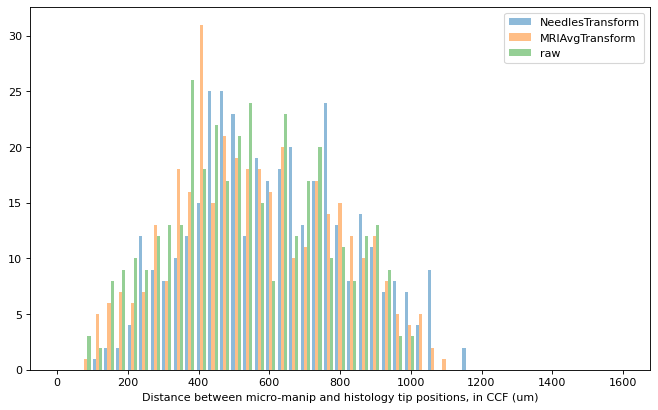

In [150]:
bins = np.linspace(0,1600,50)
plt.figure(figsize=(10, 6), dpi=80)
plt.hist([needlesDist,mriDist,rawDist], bins, alpha=0.5, label=['NeedlesTransform','MRIAvgTransform','raw'])
plt.legend(loc='upper right')
plt.xlabel('Distance between micro-manip and histology tip positions, in CCF (um)')
plt.show()